In analogy with embedded feature selection methods discussed in Chapter 10, CNNs have an embedded feature extraction mechanism that can be very helpful when working with multidimensional signals such as time-series, digital images, or videos

### 14.1 CNN, Convolution, and Cross-Correlation

The conventional way to train a classifier is to use some carefully devised feature extraction methods such as HOG (Histogram of Oriented Gradients), SIFT (Scale Invariant Feature Transform), or SURF (Speeded-Up Robust Feature), and use the extracted features in some conventional classifiers such as logistic regression or kNN.

However, in training CNNs features are extracted in the process of model construction.

Important properties of CNN:
1. **Translation Invariance:** A feature detected in one part of the image can also be detected in another part, even if it appears at a different location. If the input is translated (shifted), the output of the convolution operation will be translated in the same way.
2. **Locality:** each neuron (or unit) in a convolutional layer is connected to only a small, localized region of the input data, rather than the entire input.

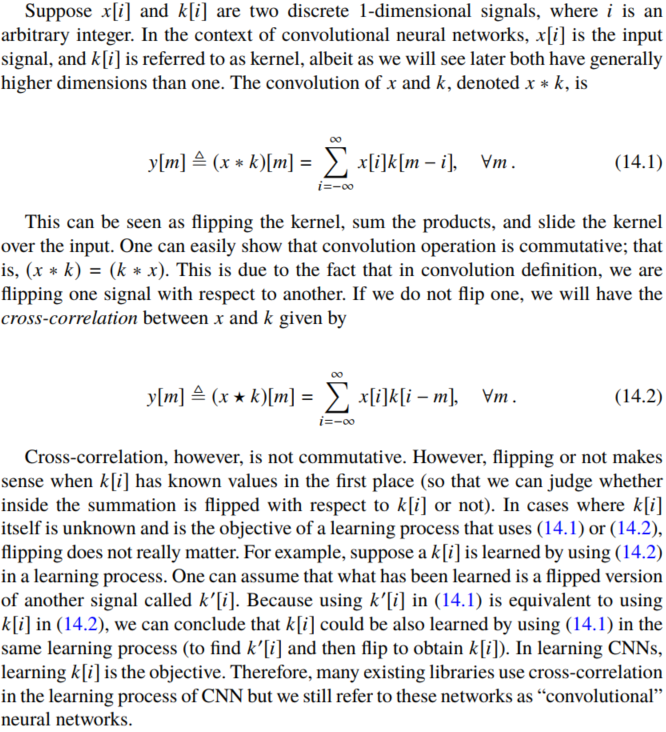

### 14.2 Working Mechanism of 2D Convolution

Depending on the type of data, convolution operation is generally categorized as 1D, 2D, or 3D convolutions. In particular, 1D, 2D, and 3D convolutions are generally used for processing multivariate time-series, images, and videos, respectively. 

The use of “2D” convolution, should not be confused with the dimensionality of input and kernel tensors used to hold the data and the kernel. For example, in the 2D convolution that is used in CNN, each input image is stored in a 3D tensor (rank-3 tensor: height, width, and depth) and the kernel is a 4D tensor (rank-4 tensor: height, width, input depth, and output depth).

#### 14.2.1 Convolution of a 2D Input Tensor with a 2D Kernel Tensor

Convolution and sparse connectivity

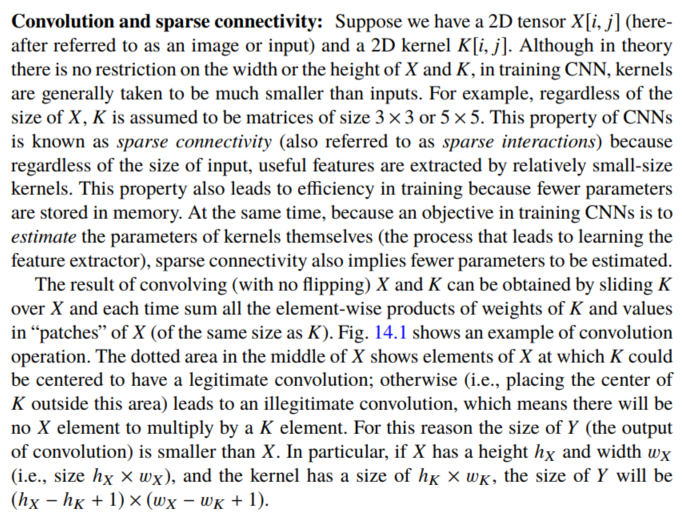

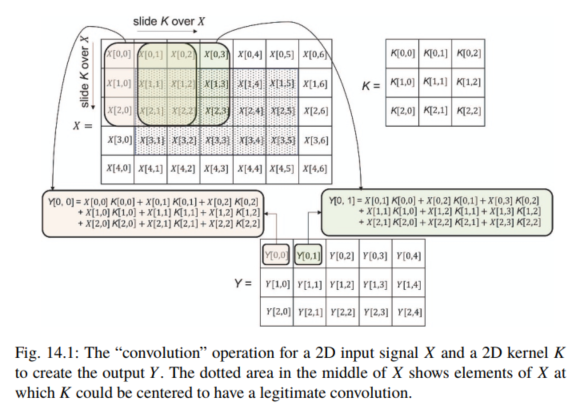

Padding

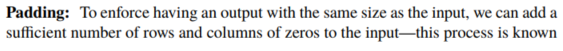

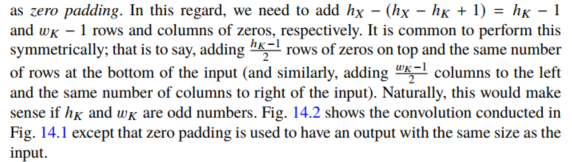

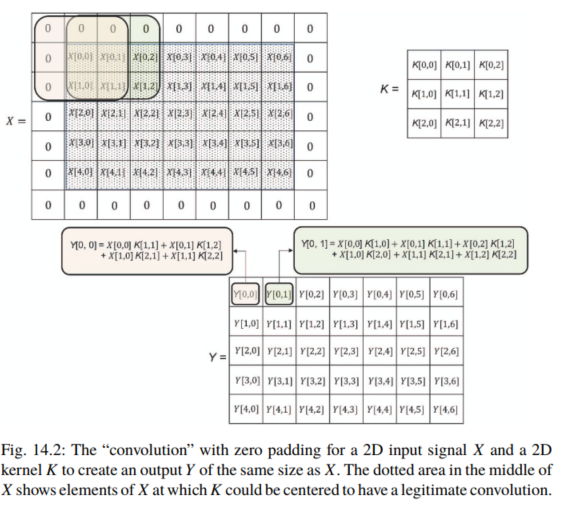

Neuron and feature map

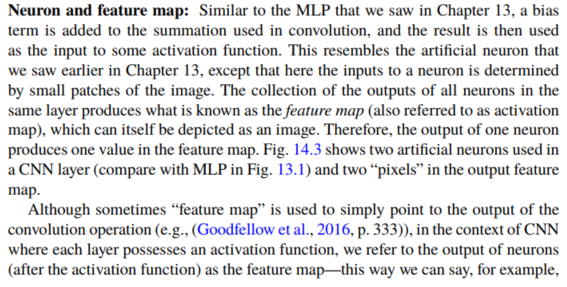

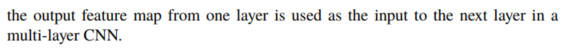

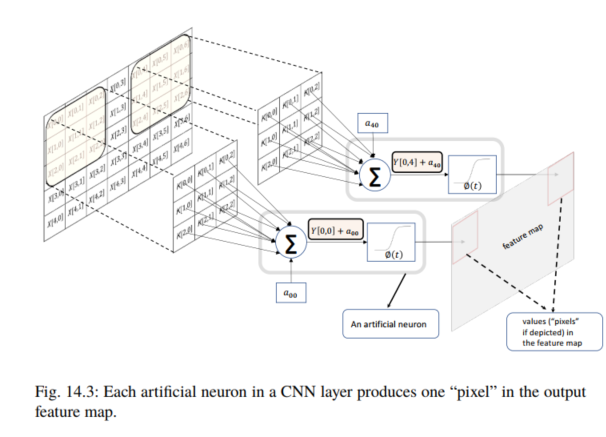

Parameter sharing

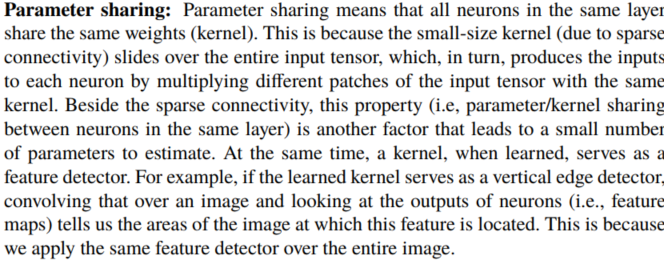

Strides

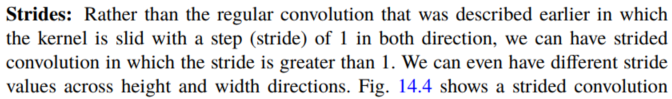

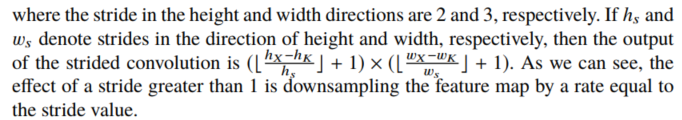

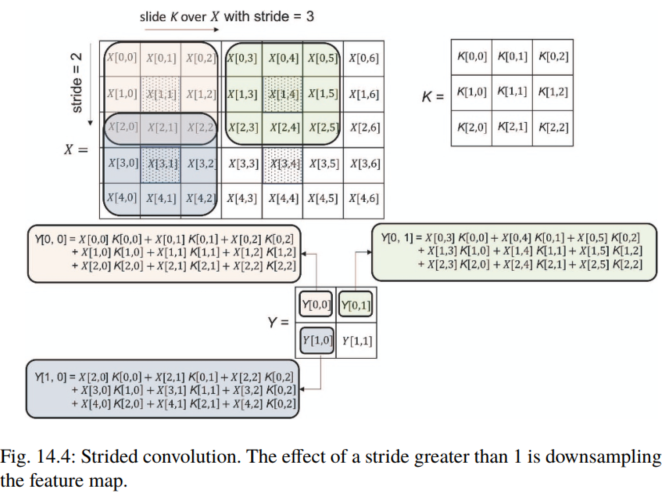

Max-pooling

- Downsample
- Local translation invariance

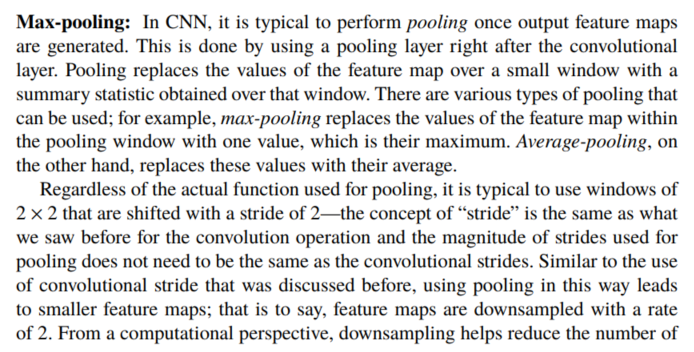

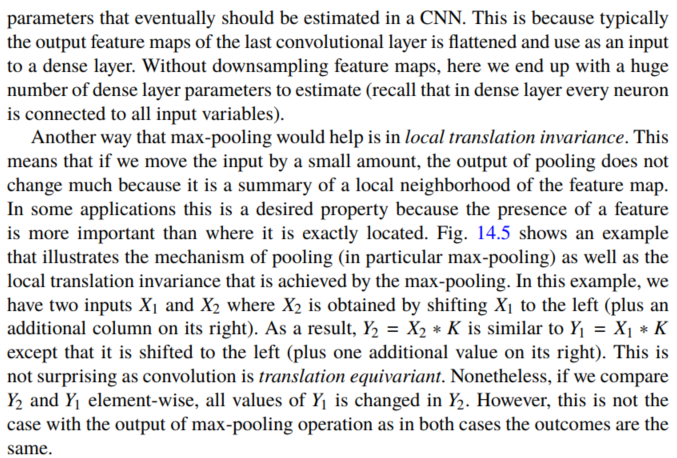

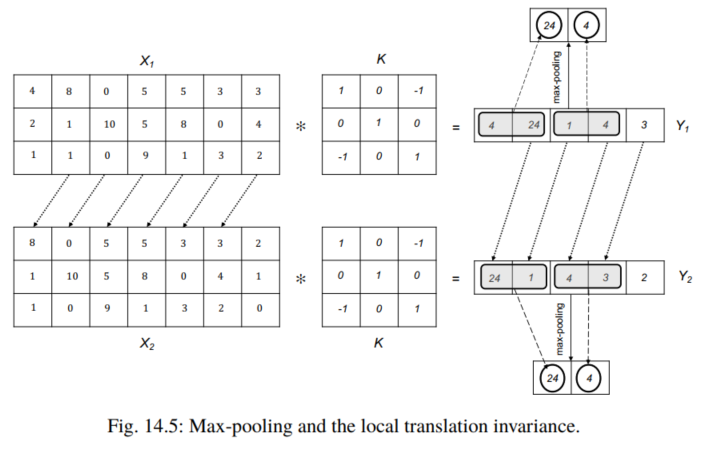

#### 14.2.2 Convolution of a 3D Input Tensor with a 4D Kernel Tensor

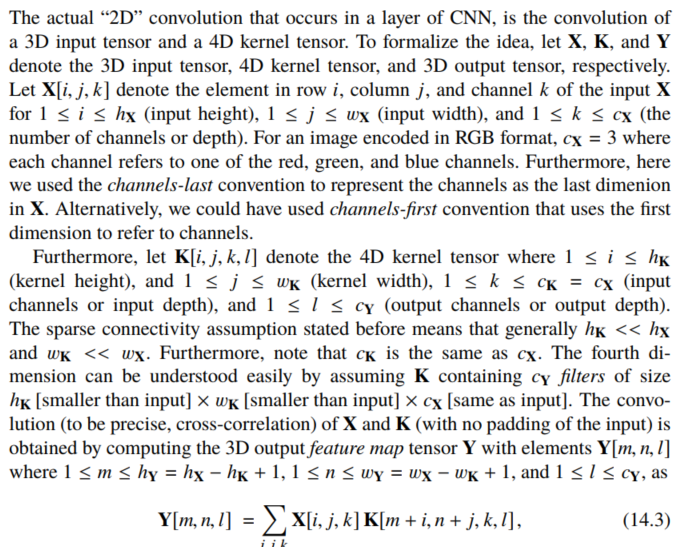

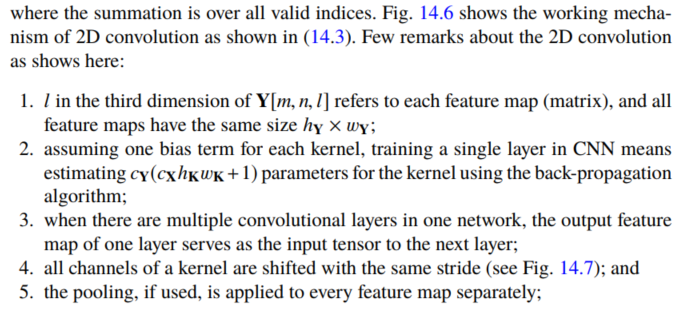

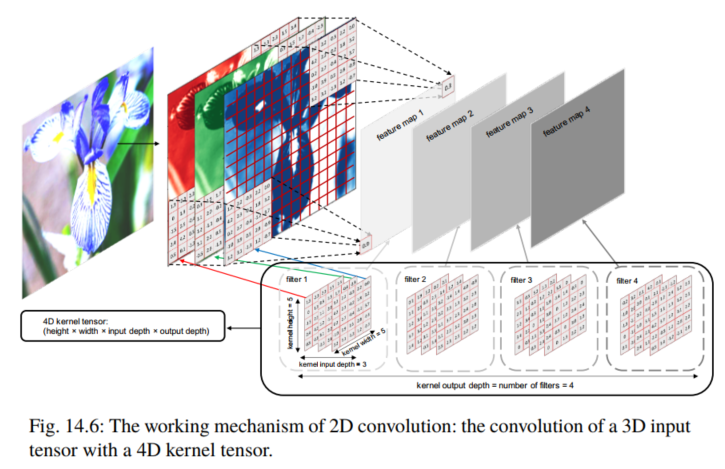

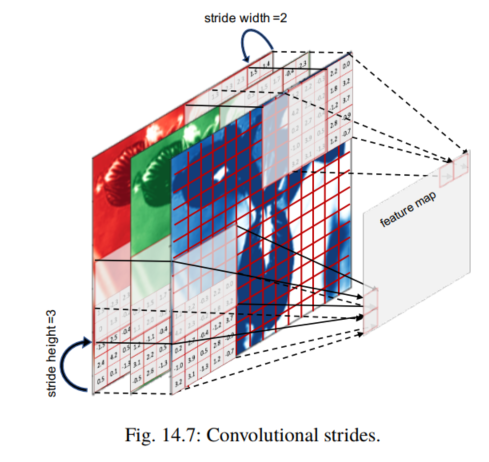

### 14.3 Implementation in Keras: Classification of Handwritten Digits

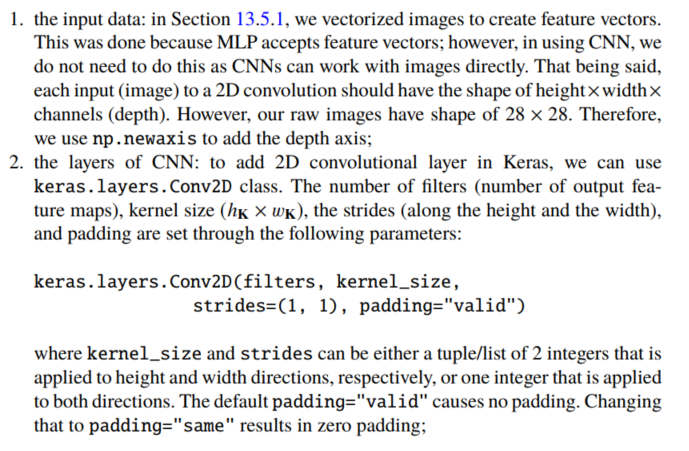

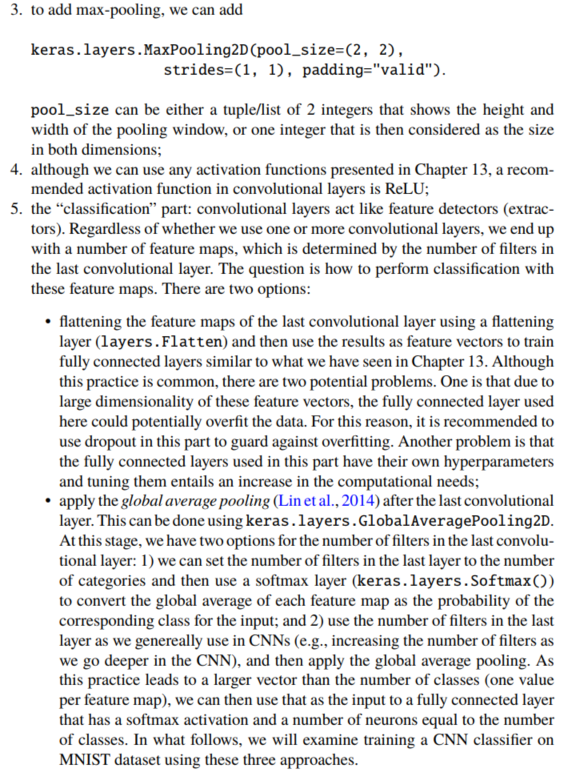

**Case 1:** Flattened feature maps of the last convolutional layer as the input to two
fully connected layers in the “classification” part of the network trained for the
MNIST application.

In [ ]:
import time
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

seed_value= 42

# setting the seed for Python built-in pseudo-random generator
import random
random.seed(seed_value)

# setting the seed for numpy pseudo-random generator
import numpy as np
np.random.seed(seed_value)

# setting the seed for tensorflow pseudo-random generator
import tensorflow as tf
tf.random.set_seed(seed_value)

# scaling (using prior knowledge)
(X_train_val, y_train_val), (X_test, y_test) = mnist.load_data()
X_train_val, X_test = X_train_val.astype('float32')/255, X_test.astype('float32')/255

# to make each input image a 3D tensor
X_train_val = X_train_val[:, :, :, np.newaxis]
X_test = X_test[:, :, :, np.newaxis]
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=0.25)
y_train_1_hot = keras.utils.to_categorical(y_train, num_classes = 10)
y_val_1_hot = keras.utils.to_categorical(y_val, num_classes = 10)
y_test_1_hot = keras.utils.to_categorical(y_test, num_classes = 10)

# building model
mnist_model = keras.Sequential([
  layers.Conv2D(16, 3, activation="relu", input_shape = X_train[0].shape),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation="relu"),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(32, activation="relu"),
  layers.Dropout(0.25),
  layers.Dense(10, activation="softmax")
])

# compiling model
mnist_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# training model
my_callbacks = [
  keras.callbacks.EarlyStopping(
  monitor="val_accuracy",
  patience=5),
  keras.callbacks.ModelCheckpoint(
  filepath="best_model.keras",
  monitor="val_loss",
  save_best_only=True,
  verbose=1)
]
start = time.time()
history = mnist_model.fit(x = X_train,
y = y_train_1_hot,
batch_size = 32,
epochs = 200,
validation_data = (X_val, y_val_1_hot),
callbacks=my_callbacks)
end = time.time()
training_duration = end - start
print("training duration = {:.3f}".format(training_duration))
print(history.history.keys())
print(mnist_model.summary())

# plotting the results
epoch_count = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(13,4), dpi=150)
plt.subplot(121)
plt.plot(epoch_count, history.history['loss'], 'b', label = 'training loss')
plt.plot(epoch_count, history.history['val_loss'], 'r', label = 'validation loss')
plt.legend()
plt.ylabel('loss')
plt.xlabel('epoch')
plt.subplot(122)
plt.plot(epoch_count, history.history['accuracy'], 'b', label = 'training accuracy')
plt.plot(epoch_count, history.history['val_accuracy'], 'r', label = 'validation accuracy')
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('epoch')
best_mnist_model = keras.models.load_model("best_model.keras")
loss, accuracy = best_mnist_model.evaluate(X_test, y_test_1_hot, verbose=1)
print('Test accuracy of the model with the lowest loss (the best model)= {:.3f}'.format(accuracy))

**Case 2:** Global average pooling with the number of filters in the last convolutional layer being equal to the number of classes in the MNIST application.

In [ ]:
# building model
mnist_model = keras.Sequential([
  layers.Conv2D(32, 3, activation="relu", input_shape = X_train[0].shape),
  layers.MaxPooling2D(),
  layers.Conv2D(10, 3, activation="relu"),
  layers.MaxPooling2D(),
  layers.GlobalAveragePooling2D(),
  keras.layers.Softmax()
])

**Case 3:** Global average pooling with a “regular” number of filters in the last convolutional layer and then a dense layer with the same number of neurons as the number
of classes.

In [ ]:
# building model
mnist_model = keras.Sequential([
  layers.Conv2D(16, 3, activation="relu", input_shape = X_train[0].shape),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation="relu"),
  layers.MaxPooling2D(),
  layers.GlobalAveragePooling2D(),
  layers.Dense(10, activation="softmax")
])